# Jupyter Data Science Workflow

### From exploratory analysis to reproducible science

In [1]:
URL='https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [2]:
from urllib.request import urlretrieve
urlretrieve(URL,'Fremont.csv')
!head Fremont.csv

Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
10/03/2012 12:00:00 AM,4,9
10/03/2012 01:00:00 AM,4,6
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,2,3
10/03/2012 04:00:00 AM,6,1
10/03/2012 05:00:00 AM,21,10
10/03/2012 06:00:00 AM,105,50
10/03/2012 07:00:00 AM,257,95
10/03/2012 08:00:00 AM,291,146


In [3]:
import pandas as pd
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
data.columns = ['West','East']
data.head()

,West,East
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


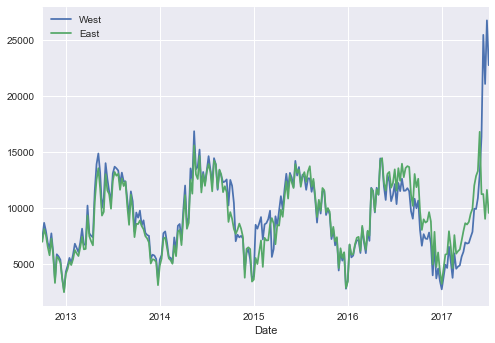

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
data.resample('W').sum().plot()

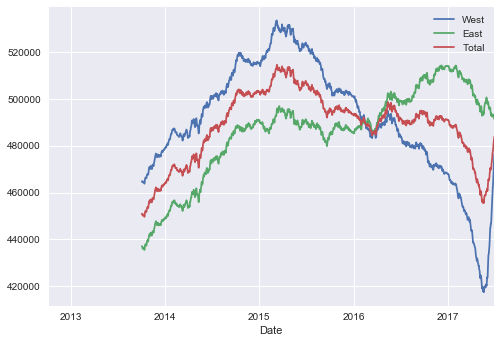

In [5]:
data['Total']= (data['East'] + data['West'])/2.
data.resample('D').sum().rolling(365).sum().plot()


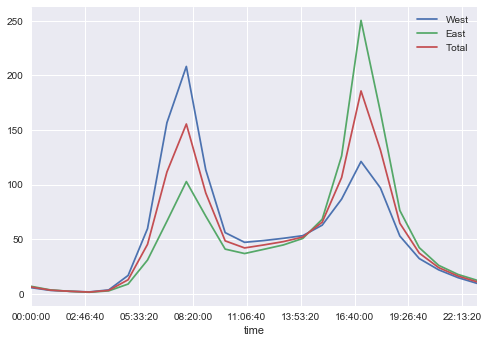

In [6]:
data.groupby(data.index.time).mean().plot()

In [7]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,6.5,9.0,5.5,7.5,5.5
01:00:00,5.0,1.5,4.0,7.5,8.5
02:00:00,1.0,4.5,3.5,4.5,1.5
03:00:00,2.5,1.5,2.0,1.5,3.0
04:00:00,3.5,4.0,4.5,2.5,1.5


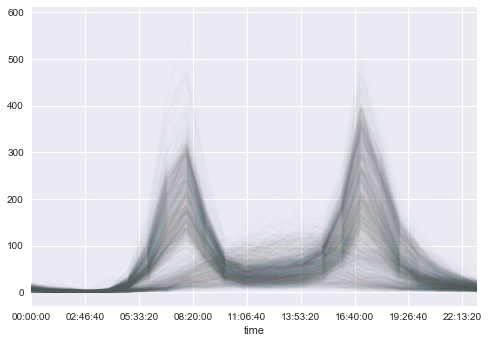

In [8]:
pivoted.plot(legend=False, alpha= 0.01)